# Intelligent Placer
В данном ноутбуке представлены пошаговые результаты выполнения программы

In [1]:
#установка необходимых библиотек
import warnings
warnings.filterwarnings('ignore')

!pip install opencv-python==4.5.2.52 --force-reinstall
!pip install opencv-python==4.5.2.52 --force-reinstall
!pip install matplotlib --upgrade
!pip install numpy --upgrade
!pip install scikit-image --upgrade
!pip install scipy --upgrade
!pip install imageio --upgrade

  Using cached opencv_python-4.5.2.52-cp39-cp39-win_amd64.whl (34.7 MB)
  Using cached numpy-1.22.3-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.3
    Uninstalling numpy-1.22.3:
      Successfully uninstalled numpy-1.22.3
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.2.52
    Uninstalling opencv-python-4.5.2.52:
      Successfully uninstalled opencv-python-4.5.2.52


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.3 which is incompatible.


  Using cached opencv_python-4.5.2.52-cp39-cp39-win_amd64.whl (34.7 MB)
  Using cached numpy-1.22.3-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.3
    Uninstalling numpy-1.22.3:
      Successfully uninstalled numpy-1.22.3
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.2.52
    Uninstalling opencv-python-4.5.2.52:
      Successfully uninstalled opencv-python-4.5.2.52


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.3 which is incompatible.


## Определение рабочей области
Фотография может быть снята на таком расстоянии, что в кадр могут попасть лишние детали. Так почему бы от них не избавиться заранее?

В процессе решения данной задачи с помощью (довольно грубого) алгоритма Кэни находится наибольший описывающий прямоугольник рабочего места. Для более детального рассмотрения пожалуйста ознакомьтесь с файлом area_grabber.py.

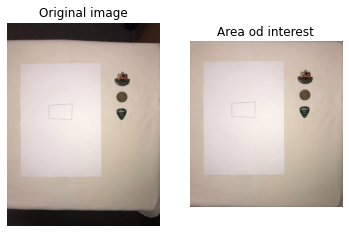

In [2]:
from intelligent_placer_lib.area_grabber import grab_area

# При желании индекс примера можно менять от 1 до 11
path = 'Data/Examples/Example_6.jpg'

# Параметр verbose здесь и далее отвечает за вывод изображений
area = grab_area(path, verbose=True)

## Выделение структурных элементов
На получившемся изображении присутствуют как многоугольник, так и объекты, которые нужно в него разместить. Для начала нужны собрать все интересующие нас данные.

В процессе решения данной задачи с помощью (более точного) алгоритма Кэни находятся описывающие прямоугольники рассматриваемых элементов, после чего они вырезаются из рабочей области и хранятся для дальнейшего пользования. Для более детального рассмотрения пожалуйста ознакомьтесь с файлом element_grabber.py.

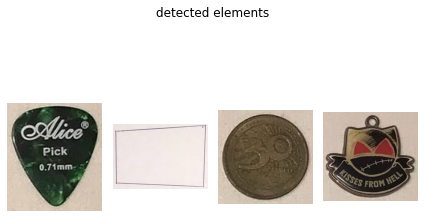

In [3]:
from intelligent_placer_lib.element_grabber import grab_elements


elements = grab_elements(area, verbose=True)

## Представление элементов и их разделение
Отлично, элементы на фотографии выделены. Теперь хотелось бы детальнее узнать, что есть что, их получить удобное представление данных.

На этот раз с помощью (довольно точного) алгоритма Кэни находятся границы каждого элемента, после чего они определяются как объект или многоугольник. Многоугольником считается элемент с наибольшей долей светлого фона. Для более детального рассмотрения пожалуйста ознакомьтесь с файлом classifier.py.

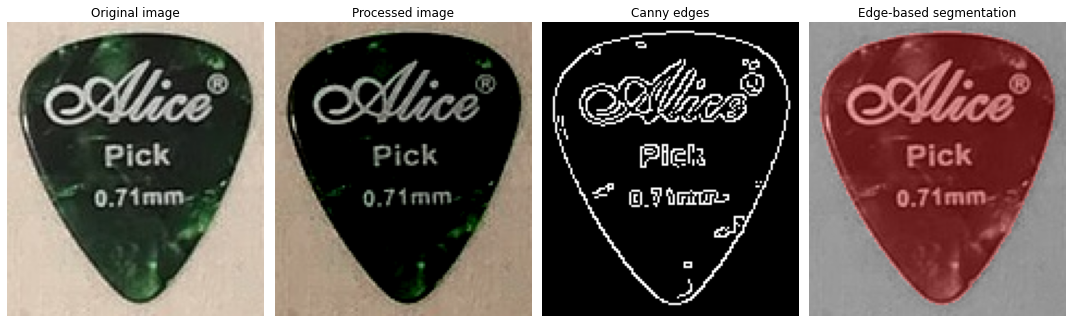

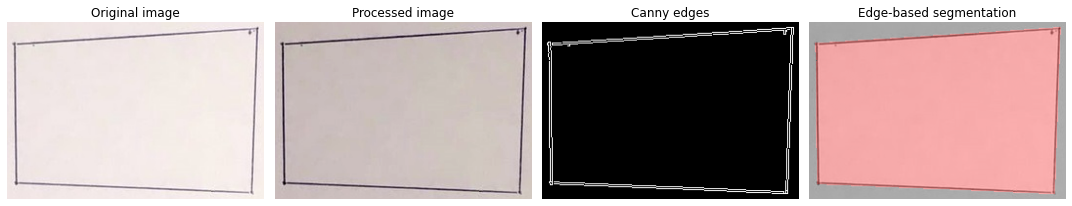

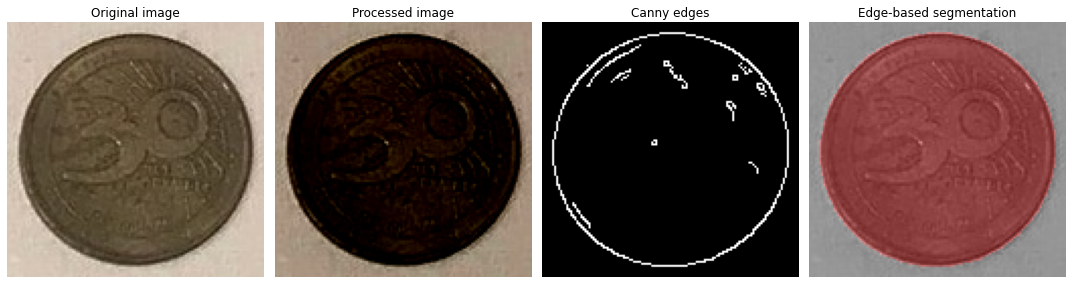

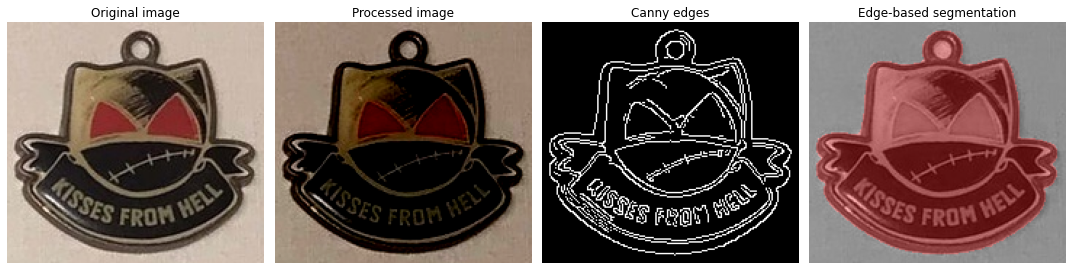

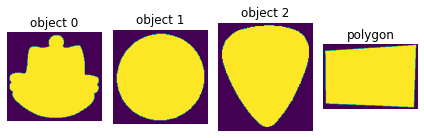

In [4]:
from intelligent_placer_lib.classifier import classify


objects, polygon = classify(elements, verbose=True)

## Размещение элементов
Переходим к главному - проверим, как будет произведен

--- Starting timer ---
	case (0, 1, 2) :
		check
		check
	case (0, 2, 1) :
		check
		check
	case (1, 0, 2) :
		check
		check
	case (1, 2, 0) :
		check
		check
	case (2, 0, 1) :
		check
		check
	case (2, 1, 0) :
		check
		check
--- 108.23958897590637 seconds ---


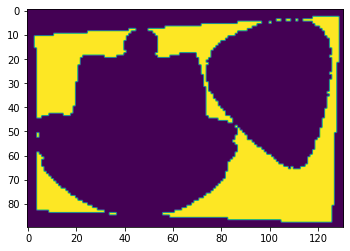

In [5]:
from intelligent_placer_lib.solver import solve
import matplotlib.pyplot as plt

max_coverage = solve(objects, polygon)

plt.imshow(max_coverage)
plt.show()

Рассмотрим метрику качества для данного изображения

In [6]:
from intelligent_placer_lib.solver import coverage_ratio

print('R =', coverage_ratio(max_coverage, objects, polygon))

R = 0.7028039383561644


## Полный цикл работы

Рассмотрим полный цикл работы программы, реализованный функцией check_image(path : str):

Getting processable image area...Complete!
Classifying elements...Complete!
Detected 3 objects
Placing objects...
--- Starting timer ---
	case (0, 1, 2) :
		check
		check
	case (0, 2, 1) :
		check
		check
	case (1, 0, 2) :
		check
		check
	case (1, 2, 0) :
		check
		check
	case (2, 0, 1) :
		check
		check
	case (2, 1, 0) :
		check
		check
--- 137.56849455833435 seconds ---
Complete!
R = 0.7028039383561644


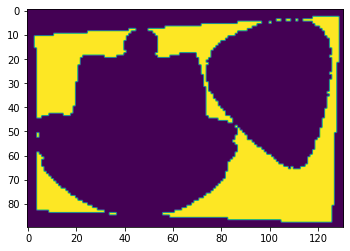

In [7]:
from intelligent_placer_lib.intelligent_placer import check_image

check_image(path)